# Obtain_numbers

### This prg is extracting a "data.pcl" file from the Database which is then later used by Train and Draw. 

#### Import Libraries, see 
#### https://pythontips.com/2013/08/02/what-is-pickle-in-python/
#### for info about pickle

In [1]:
#!/usr/bin/python3

import numpy as np
import random as random
import pickle as pickle

#### Load Database

In [2]:
print ( "Now loading database" )

Now loading database


In [3]:
from smodels.experiment.databaseObj import Database

In [4]:
database=Database("database/")

In [5]:
from smodels.tools.physicsUnits import GeV, fb

In [6]:
expres = database.getExpResults( analysisIDs=["CMS-PAS-SUS-12-026"] )[0]

In [7]:
print ( "Done loading database" )

Done loading database


#### Get upper limits, extract training data

In [8]:
tr_data, tr_labels = [], []
val_data, val_labels=[], []
print ( "Now get upper limits" )

Now get upper limits


##### Below the training data is beeing simulated

In [9]:
for mother in np.arange ( 600., 1100., 5. ):    #mother from 600 to 1100 in 5-steps
    for lsp in np.arange ( 0., mother, 10. ):        #lsp from 0 to mother in 10-steps
        masses=[[ mother*GeV, lsp*GeV], [ mother*GeV, lsp*GeV] ]      #two similar mass tupel mother/lsp
        ul = expres.getUpperLimitFor ( txname="T1tttt", mass=masses )   #upper limits for [[[t,t]],[[t,t]]] Topology
        if type(ul) == type(None):    #if there is no upper limit 
            continue     #next loop of lsp iteration
        tr_data.append ( np.array( [ mother, lsp ] ) )     #append the mother/lsp to training data
        tr_labels.append ( ul.asNumber(fb) )    #append labels
        if mother == 700. and lsp==200.:    #for certain value of mother and lsp print mother/lsp/ul comb
            print ( "training data", mother, lsp, ul.asNumber(fb) )

training data 700.0 200.0 51.671


###### simulate validation data...

In [10]:
for i in range(100):
    mother=random.uniform ( 600. , 1100. )    #
    lsp = random.uniform ( 0., mother-10. )    #
    masses=[[ mother*GeV, lsp*GeV], [ mother*GeV, lsp*GeV] ]
    ul = expres.getUpperLimitFor ( txname="T1tttt", mass=masses )
    if type(ul) == type(None):
        continue
    val_data.append ( np.array( [ mother, lsp ] ) )
    val_labels.append ( ul.asNumber(fb) )

In [11]:
tr_data

[array([600.,   0.]),
 array([600.,  10.]),
 array([600.,  20.]),
 array([600.,  30.]),
 array([600.,  40.]),
 array([600.,  50.]),
 array([600.,  60.]),
 array([600.,  70.]),
 array([600.,  80.]),
 array([600.,  90.]),
 array([600., 100.]),
 array([600., 110.]),
 array([600., 120.]),
 array([600., 130.]),
 array([600., 140.]),
 array([600., 150.]),
 array([600., 160.]),
 array([600., 170.]),
 array([600., 180.]),
 array([600., 190.]),
 array([600., 200.]),
 array([600., 210.]),
 array([600., 220.]),
 array([600., 230.]),
 array([600., 240.]),
 array([600., 250.]),
 array([605.,   0.]),
 array([605.,  10.]),
 array([605.,  20.]),
 array([605.,  30.]),
 array([605.,  40.]),
 array([605.,  50.]),
 array([605.,  60.]),
 array([605.,  70.]),
 array([605.,  80.]),
 array([605.,  90.]),
 array([605., 100.]),
 array([605., 110.]),
 array([605., 120.]),
 array([605., 130.]),
 array([605., 140.]),
 array([605., 150.]),
 array([605., 160.]),
 array([605., 170.]),
 array([605., 180.]),
 array([60

Write data to file, this file is then used by "Train" and "Draw"

In [12]:
f=open("data.pcl","wb")
pickle.dump ( tr_data, f )
pickle.dump ( tr_labels, f )
pickle.dump ( val_data, f )
pickle.dump ( val_labels, f )
f.close()

# Train

### The model is trained here

Import stuff

In [13]:
#!/usr/bin/python3

import os
os.environ["KERAS_BACKEND"] = "tensorflow" #tell keras to run on tensorflow
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras import callbacks
import time #
import IPython

Using TensorFlow backend.


Construct and Compile the model

In [14]:
#inputs = Input(shape=(1,))
#preds = Dense(1,activation='linear')(inputs)
#model = Model ( inputs=inputs, outputs=preds )
## define the network
fl = 8
mid = 20

model = Sequential()
model.add(Dense(fl, activation="linear", input_shape=(2,)))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(mid, activation="relu"))
model.add(Dense(fl, activation="relu"))
model.add(Dense(1, activation="linear" ))

#model.add(Dense(4, activation="linear", input_shape=(2,)))
#model.add(Dense(16, activation="relu"))
#model.add(Dense(4, activation="relu"))
#model.add(Dense(1, activation="linear" ))
model.summary()

model.compile ( loss="mean_squared_error", optimizer="adam", metrics=["mse"] )
# model.compile ( loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"] )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
__________

Loading the data

In [15]:
print ( "Now loading data" )
import pickle
f=open("data.pcl","rb")
tr_data=pickle.load ( f )
tr_labels=pickle.load ( f )
val_data=pickle.load ( f )
val_labels=pickle.load ( f )
f.close()

Now loading data


Create dictionary with training data and labels such that $dict(mother \cdot 10000 + lsp) = ul$

In [16]:
def hash ( A ): #define a function that is merging two values into one
    return int(A[0]*10000.+A[1])

X={} #create empty dictionary
for d,l in zip (tr_data,tr_labels): #fill dictionary with training data and labels
    X[hash(d)]=l

Do some tensorboard stuff such that the loss function is visualized.

In [17]:
#cbk=callbacks.TensorBoard ( "logs/log_test_"+str(time.time()), histogram_freq=1, write_graph=True )
cbk=callbacks.TensorBoard ( "logs/log.me", histogram_freq=1, write_graph=True )
cbk.set_model ( model )

Fitting the model

In [18]:
print ( "Now fitting ... " )
history=model.fit ( np.array(tr_data), np.array(tr_labels), \
                    validation_data = ( np.array(val_data), np.array(val_labels) ), 
                    batch_size=50, epochs=200, callbacks = [ cbk ] )
print ( "Done fitting" )

Now fitting ... 
Train on 5050 samples, validate on 64 samples
Epoch 1/200
5050/5050 [==============================] - 1s 198us/step - loss: 1221.0917 - mean_squared_error: 1221.0917 - val_loss: 262.0357 - val_mean_squared_error: 262.0357
Epoch 2/200
5050/5050 [==============================] - 0s 63us/step - loss: 248.4583 - mean_squared_error: 248.4583 - val_loss: 303.5986 - val_mean_squared_error: 303.5986
Epoch 3/200
5050/5050 [==============================] - 0s 64us/step - loss: 246.4988 - mean_squared_error: 246.4988 - val_loss: 262.2544 - val_mean_squared_error: 262.2544
Epoch 4/200
5050/5050 [==============================] - 0s 66us/step - loss: 243.4893 - mean_squared_error: 243.4893 - val_loss: 271.7461 - val_mean_squared_error: 271.7461
Epoch 5/200
5050/5050 [==============================] - 0s 75us/step - loss: 242.9452 - mean_squared_error: 242.9452 - val_loss: 282.5703 - val_mean_squared_error: 282.5703
Epoch 6/200
5050/5050 [==============================] - 0s 65us

5050/5050 [==============================] - 0s 77us/step - loss: 8.7186 - mean_squared_error: 8.7186 - val_loss: 14.1605 - val_mean_squared_error: 14.1605
Epoch 97/200
5050/5050 [==============================] - 0s 65us/step - loss: 10.1234 - mean_squared_error: 10.1234 - val_loss: 8.5440 - val_mean_squared_error: 8.5440
Epoch 98/200
5050/5050 [==============================] - 0s 59us/step - loss: 9.7367 - mean_squared_error: 9.7367 - val_loss: 14.5287 - val_mean_squared_error: 14.5287
Epoch 99/200
5050/5050 [==============================] - 0s 62us/step - loss: 17.5427 - mean_squared_error: 17.5427 - val_loss: 18.6176 - val_mean_squared_error: 18.6176
Epoch 100/200
5050/5050 [==============================] - 0s 61us/step - loss: 13.4302 - mean_squared_error: 13.4302 - val_loss: 15.6759 - val_mean_squared_error: 15.6759
Epoch 101/200
5050/5050 [==============================] - 0s 70us/step - loss: 10.8532 - mean_squared_error: 10.8532 - val_loss: 13.8890 - val_mean_squared_error:

Epoch 193/200
5050/5050 [==============================] - 0s 72us/step - loss: 6.8518 - mean_squared_error: 6.8518 - val_loss: 13.3452 - val_mean_squared_error: 13.3452
Epoch 194/200
5050/5050 [==============================] - 0s 94us/step - loss: 7.6633 - mean_squared_error: 7.6633 - val_loss: 6.0075 - val_mean_squared_error: 6.0075
Epoch 195/200
5050/5050 [==============================] - 0s 60us/step - loss: 5.1141 - mean_squared_error: 5.1141 - val_loss: 4.4673 - val_mean_squared_error: 4.4673
Epoch 196/200
5050/5050 [==============================] - 0s 76us/step - loss: 9.1152 - mean_squared_error: 9.1152 - val_loss: 10.6900 - val_mean_squared_error: 10.6900
Epoch 197/200
5050/5050 [==============================] - 0s 62us/step - loss: 5.9367 - mean_squared_error: 5.9367 - val_loss: 13.0730 - val_mean_squared_error: 13.0730
Epoch 198/200
5050/5050 [==============================] - 0s 63us/step - loss: 6.8339 - mean_squared_error: 6.8339 - val_loss: 10.7061 - val_mean_squared

Make predictions

In [19]:
mass = np.array( [ [ 600, 200 ], [ 700, 200 ], [ 800, 200 ], [ 900, 200 ], [ 1000, 200 ] ] )
preds=model.predict ( mass )
print ( "Now predict" ) 
for m,p in zip ( mass,preds ):
    print ( "%s -> %s, %s" % ( m,p[0], X[hash(m)] ) )

Now predict
[600 200] -> 79.38488, 80.607
[700 200] -> 54.30932, 51.671
[800 200] -> 47.06665, 50.13400000000001
[900 200] -> 37.898804, 38.415
[1000  200] -> 37.89988, 44.747


Save the model

In [20]:
model.save("model.h5")
model.save_weights("weights.h5")
# IPython.embed()

# Draw

###### This prg does the plots of the maps

Import the libraries

In [21]:
#!/usr/bin/python3

import matplotlib.pyplot as plt
import numpy as np
import keras.models

Load Database

In [22]:
print ( "Now loading data" )
import pickle
f=open("data.pcl","rb")
tr_data=pickle.load ( f )
tr_labels=pickle.load ( f )
val_data=pickle.load ( f )
val_labels=pickle.load ( f )
f.close()

def Hash ( A ):
    return int(A[0]*10000.+A[1])
X={}
for d,l in zip (tr_data,tr_labels):
    X[Hash(d)]=l

Now loading data


Create mass arrays with fixed lsp=300, but different mothers.

In [23]:
masses = [] 
for i in range ( 600, 1000, 10 ):
    masses.append ( [ i, 300 ] )
    
mass = np.array( masses )

Create some empty Arrays and stuff

In [24]:
pX, pY, pYm = [], [], []

Load the model

In [25]:
model = keras.models.load_model ( "model.h5")

...and make predictions

In [26]:
preds=model.predict ( mass )

Create a tupel list with mass and predictions

In [27]:
for m,p in zip(mass,preds):
    try:
        pY.append ( X[Hash(m)] )   #X[Hash(m)] gives the upperlimit for the masses
        pX.append ( m[0] )         #m[0] gives the mother
        pYm.append ( p )           #p is the predictions
    except:
        pass

Do the actual plots

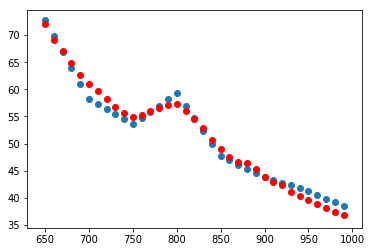

In [28]:
plt.scatter ( pX, pY )
plt.scatter ( pX, pYm, c='r' )
plt.savefig ( "plot.png" )

#preds=model.predict ( mass )
#print ( "Now predict" )
#for m,p in zip ( mass,preds ):
#    print ( "%s -> %s, %s" % ( m,p[0], X[hash(m)] ) )

### Creating the heatmap

In [29]:
Heat_calc = [[0 for i in range(40)] for j in range(40)]
Heat_pred = [[0 for i in range(40)] for j in range(40)]

In [30]:
i = 0
for mother in range ( 600, 1000, 10 ):
    Hmasses = []
    Hpreds = []
    for lsp in range (0, 400, 10 ):
        Hmasses.append ( [ mother, lsp ] )
    Hmass = np.array( Hmasses )
    Hpreds=model.predict ( Hmass )
    j=0    
    for m in Hmass:
        try:
            Heat_calc[i][j] = X[Hash(m)]    #X[Hash(m)] gives the upperlimit for the masses
            Heat_pred[i][j] = Hpreds[j][0]            #p is the predictions
        except:
            Heat_calc[i][j] = 0    #X[Hash(m)] gives the upperlimit for the masses
            Heat_pred[i][j] = 0            #p is the predictions
        j+=1
    i+=1

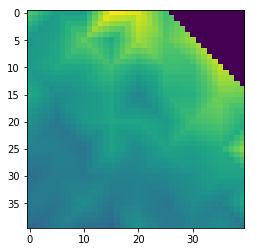

In [31]:
plt.imshow(Heat_calc)
plt.show()

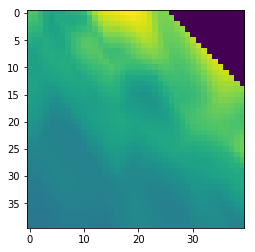

In [32]:
plt.imshow(Heat_pred)
plt.show()

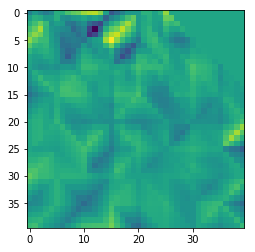

In [33]:
Heat_diff = (np.array(Heat_pred) - np.array(Heat_calc))#**2 #quadratischer Fehler
plt.imshow(Heat_diff)
plt.show()

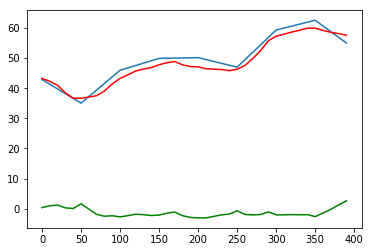

In [51]:
plt.plot ( [i*10 for i in range(40)], Heat_calc[20])
plt.plot ( [i*10 for i in range(40)], Heat_pred[20], c = 'r')
plt.plot ( [i*10 for i in range(40)], Heat_diff[20], c = 'g')

# Timing

###### This prg does time measurements for the limit predictions with some simulated data

Import Libraries

In [35]:
#!/usr/bin/python3

import numpy as np
import keras.models
import random
import time

Load Database and Model

In [36]:
print ( "Now loading database" )
from smodels.experiment.databaseObj import Database
database=Database("database/")
from smodels.tools.physicsUnits import GeV, fb

expres = database.getExpResults( analysisIDs=["CMS-PAS-SUS-12-026"] )[0]
model = keras.models.load_model ( "model.h5")

print ( "Done loading database" )

Now loading database
Done loading database


Initialize mass arrays

In [37]:
masses, massesG = [], []

Simulate some Data

In [38]:
for i in range(10000):
    mother = random.uniform ( 600, 1099 )
    lsp = random.uniform ( 1, mother )
    masses.append ( np.array ( [ mother, lsp ] ) )
    massesG.append ( [ [ mother*GeV, lsp*GeV ],  [ mother*GeV, lsp*GeV ] ] )

In [39]:
len(masses)

10000

Calculate the upper limits exectly and measure time, 

In [40]:
print ( "Full ... " )
t0=time.time()    #get system time
ulF,ulK,ulC=[],[],[]
for m in massesG:       #get upperlimits for all masses
    ul = expres.getUpperLimitFor ( txname="T1tttt", mass=m )
    ulF.append ( ul )
t1=time.time()       #fully calculating upper limits took ...

Full ... 


In [41]:
ulF

[3.73E-02 [pb],
 None,
 4.74E-02 [pb],
 5.04E-02 [pb],
 None,
 3.68E-02 [pb],
 None,
 4.40E-02 [pb],
 None,
 2.83E-02 [pb],
 3.63E-02 [pb],
 None,
 None,
 5.85E-02 [pb],
 5.45E-02 [pb],
 7.50E-02 [pb],
 None,
 4.77E-02 [pb],
 None,
 6.37E-02 [pb],
 6.64E-02 [pb],
 7.56E-02 [pb],
 4.06E-02 [pb],
 6.88E-02 [pb],
 None,
 4.87E-02 [pb],
 None,
 None,
 3.26E-02 [pb],
 4.89E-02 [pb],
 None,
 4.20E-02 [pb],
 5.73E-02 [pb],
 6.62E-02 [pb],
 None,
 5.79E-02 [pb],
 None,
 None,
 4.55E-02 [pb],
 6.66E-02 [pb],
 None,
 6.38E-02 [pb],
 None,
 None,
 None,
 None,
 None,
 4.84E-02 [pb],
 3.55E-02 [pb],
 4.20E-02 [pb],
 None,
 3.67E-02 [pb],
 4.28E-02 [pb],
 4.03E-02 [pb],
 3.89E-02 [pb],
 6.33E-02 [pb],
 3.62E-02 [pb],
 None,
 4.62E-02 [pb],
 4.12E-02 [pb],
 None,
 4.91E-02 [pb],
 5.72E-02 [pb],
 None,
 None,
 3.05E-02 [pb],
 None,
 5.06E-02 [pb],
 5.55E-02 [pb],
 3.71E-02 [pb],
 3.51E-02 [pb],
 4.07E-02 [pb],
 4.76E-02 [pb],
 None,
 4.68E-02 [pb],
 7.19E-02 [pb],
 None,
 4.03E-02 [pb],
 None,
 4.90E

In [42]:
print ( "Keras batch ... " )
ulB=model.predict ( np.array ( masses ) )      #why whole list?????
t2=time.time()     #predicting upper limits with keras took.....

Keras batch ... 


In [43]:
len(ulB)

10000

In [44]:
print ( "Keras ... " )
for m in masses:  #every element in the list
    pred=model.predict ( np.array ( [ m ] ) )
    ulK.append ( pred )
t3=time.time()     #predicting -||- (difference??)

Keras ... 


In [46]:
print ( "Keras chunk ... " )
for i in range(100):
    ul=model.predict ( np.array ( masses[i::100] ) )  #all mothers?
    for x in ul:
        ulC.append ( x )
t4=time.time()

Keras chunk ... 


Print Limits and Time

In [48]:
print ("Limits Full ", ulF[:3] )
print ("Limits Keras", ulK[:3] )
print ("Limits Keras", ulB[:3] )
print ("Limits Keras", ulC[:3] )
print ("Time Full ", t1-t0 )
print ("Time Keras", t2-t1 )
print ("Time Batch", t3-t2 )
print ("Time Chunk", t4-t3 )

Limits Full  [3.73E-02 [pb], None, 4.74E-02 [pb]]
Limits Keras [array([[37.144768]], dtype=float32), array([[65.742676]], dtype=float32), array([[47.867336]], dtype=float32)]
Limits Keras [[37.14477 ]
 [65.74269 ]
 [47.867355]]
Limits Keras [array([37.14477], dtype=float32), array([58.922707], dtype=float32), array([72.34282], dtype=float32)]
Time Full  4.6314496994018555
Time Keras 0.7344794273376465
Time Batch 9.442819833755493
Time Chunk 0.6120951175689697
